In [2]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

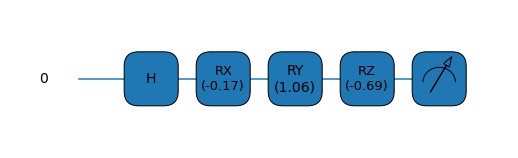

In [3]:
device = qml.device('qiskit.aer', wires=3, backend='qasm_simulator')
params = np.random.normal(0,np.pi/2, 3)
params = Variable(torch.tensor(params), requires_grad=True)

@qml.qnode(device, interface="torch")
def circuit(params, M=None):
    qml.Hadamard(wires=0)
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=0)
    qml.RZ(params[2], wires=0)
    
    return qml.expval(qml.Hermitian(M, wires=[0]))
fig, ax = qml.draw_mpl(circuit, decimals=2)(params)
plt.show()

In [4]:
import random
a = random.random()
b = (1-a**2)**0.5
target_state = np.array([a, b])
target_op = np.outer(target_state.conj(), target_state)
target_op = torch.tensor(target_op)
print(target_state)
print(target_op)

[0.53313827 0.84602812]
tensor([[0.2842, 0.4510],
        [0.4510, 0.7158]], dtype=torch.float64)


In [5]:
def cost(params):
    L = (1-(circuit(params, M=target_op)))**2
    return L

In [6]:
opt = torch.optim.Adam([params], lr=0.1)
best_loss = 1*cost(params)
best_params = 1*params

In [7]:
fidelity=[]
epochs=[]
for epoch in range(32):
    f = circuit(best_params, M=target_op).item()
    opt.zero_grad()
    loss = cost(params)
    print(epoch, loss)
    loss.backward()
    opt.step()
    fidelity.append(f)
    epochs.append(epoch)
    if loss < best_loss:
        best_loss = 1*loss
        best_params = 1*params

0 tensor(0.0190, dtype=torch.float64, grad_fn=<PowBackward0>)
1 tensor(0.0103, dtype=torch.float64, grad_fn=<PowBackward0>)
2 tensor(0.0061, dtype=torch.float64, grad_fn=<PowBackward0>)
3 tensor(0.0033, dtype=torch.float64, grad_fn=<PowBackward0>)
4 tensor(0.0010, dtype=torch.float64, grad_fn=<PowBackward0>)
5 tensor(0.0002, dtype=torch.float64, grad_fn=<PowBackward0>)
6 tensor(3.4332e-05, dtype=torch.float64, grad_fn=<PowBackward0>)
7 tensor(3.8147e-06, dtype=torch.float64, grad_fn=<PowBackward0>)
8 tensor(0., dtype=torch.float64, grad_fn=<PowBackward0>)
9 tensor(0., dtype=torch.float64, grad_fn=<PowBackward0>)
10 tensor(1.5259e-05, dtype=torch.float64, grad_fn=<PowBackward0>)
11 tensor(0.0002, dtype=torch.float64, grad_fn=<PowBackward0>)
12 tensor(9.5367e-05, dtype=torch.float64, grad_fn=<PowBackward0>)
13 tensor(0.0003, dtype=torch.float64, grad_fn=<PowBackward0>)
14 tensor(0.0004, dtype=torch.float64, grad_fn=<PowBackward0>)
15 tensor(0.0011, dtype=torch.float64, grad_fn=<PowBackwa

In [20]:
print(circuit(best_params, M=target_op).item())

0.9999999999999999


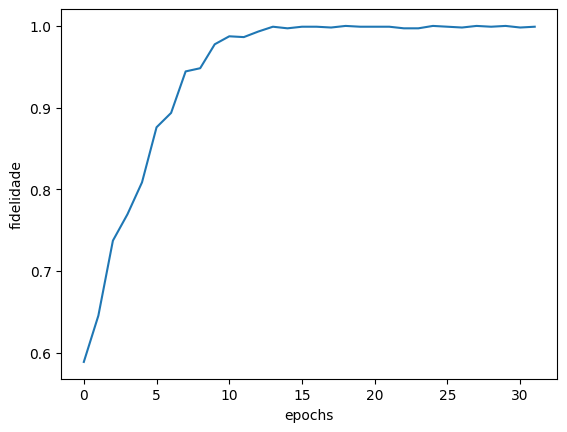

In [22]:
plt.plot(epochs, fidelity)
plt.xlabel('epochs')
plt.ylabel('fidelidade')
plt.show()